# Replacement Ratio Visualisations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import re
import os
import matplotlib.colors as mcolors

Read in datasets

In [2]:
reg_rr = pd.read_csv('regional_replacement_ratio.csv') 
sec_rr = pd.read_csv('sector_replacement_ratio.csv')

In [3]:
reg_rr['R_nonEU'] = reg_rr['R_nonEU'].fillna(0)
reg_rr

,nuts318cd,delta_eu,delta_noneu,delta_uk,R_nonEU,R_UK,replacement_coverage,replacement_gap,replacement_type
0,UKI33,-0.025029,0.044192,-0.019163,1.765600,0.0,1.765600,-0.019163,Non-EU-led replacement
1,UKI32,-0.022668,0.037659,-0.014991,1.661357,0.0,1.661357,-0.014991,Non-EU-led replacement
2,UKI45,-0.020996,0.044489,-0.023493,2.118960,0.0,2.118960,-0.023493,Non-EU-led replacement
3,UKI41,-0.018508,0.036375,-0.017867,1.965377,0.0,1.965377,-0.017867,Non-EU-led replacement
4,UKI31,-0.017520,0.039030,-0.021509,2.227671,0.0,2.227671,-0.021509,Non-EU-led replacement
...,...,...,...,...,...,...,...,...,...
174,UKF24,0.007434,0.023979,-0.031413,0.000000,NaN,NaN,NaN,No EU drop
175,UKH32,0.008227,0.023773,-0.032000,0.000000,NaN,NaN,NaN,No EU drop
176,UKF15,0.008599,0.022942,-0.031542,0.000000,NaN,NaN,NaN,No EU drop
177,UKF12,0.010267,0.022860,-0.033127,0.000000,NaN,NaN,NaN,No EU drop


## Regional Replacement Ratio 

Will now read in the relevant shape files for mapping data to the Nomenclature of Territorial Units for Statistics 3 (NUTS3) regions

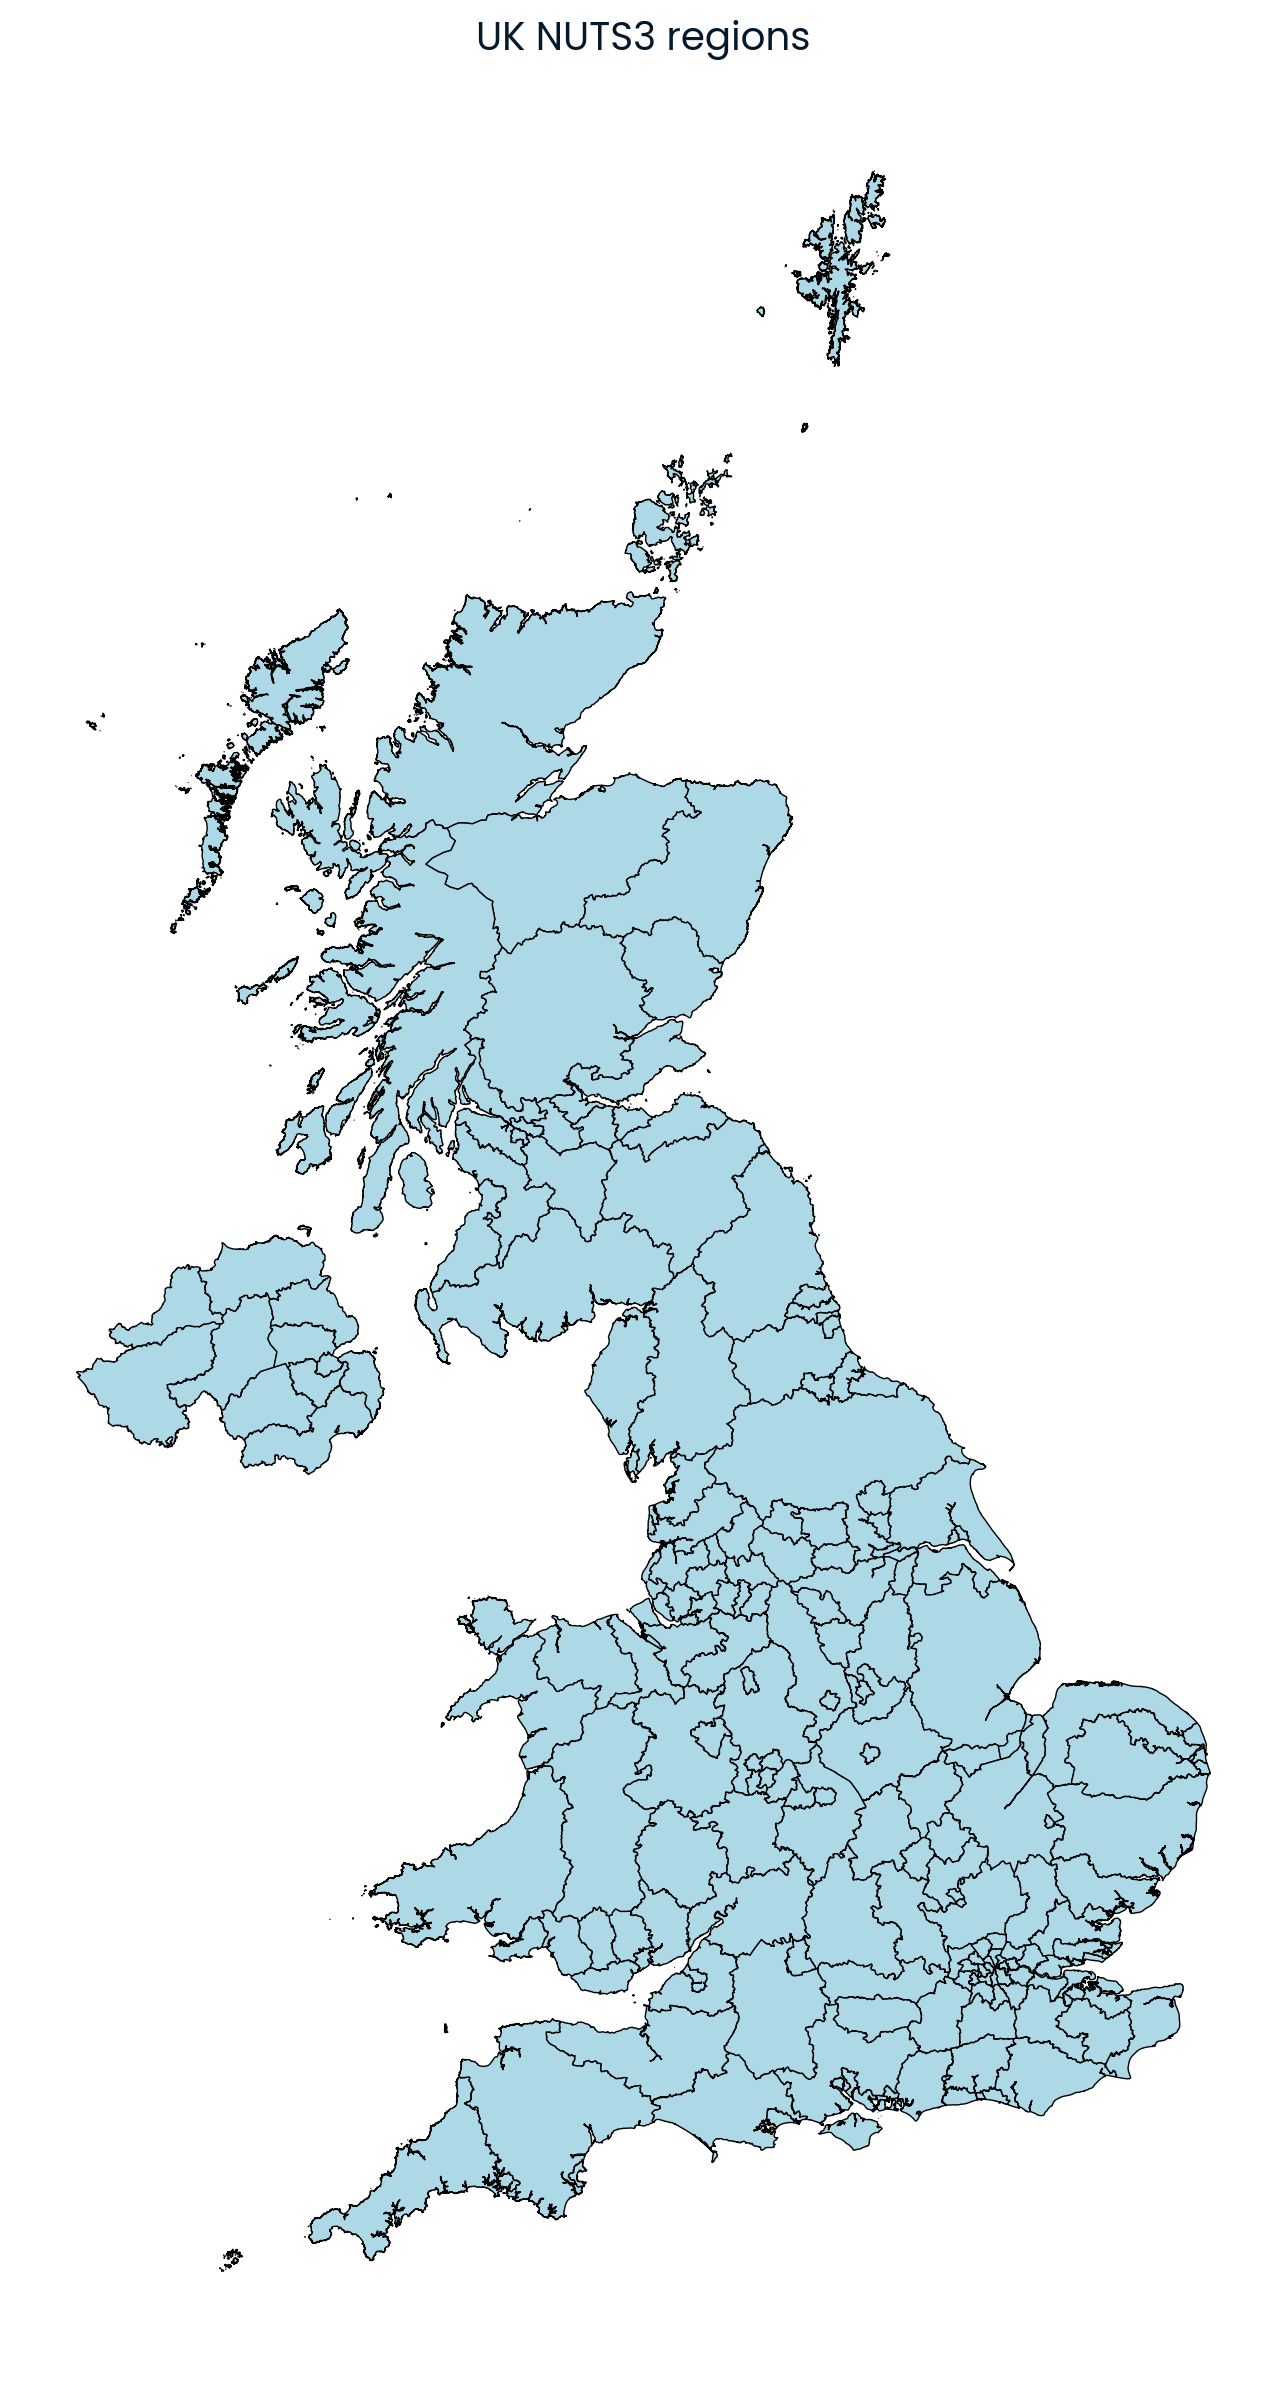

In [4]:
# Path to your shapefile (ensure all associated files are in the same directory)
shapefile_path = 'NUTS_Level_3_January_2018_GCB_in_the_United_Kingdom.shp'

# Read the shapefile into a GeoDataFrame
nuts3_gdf = gpd.read_file(shapefile_path)

# Plot the filtered wards with thinner boundary lines
fig, ax = plt.subplots(1, 1, figsize=(12, 15))
nuts3_gdf.plot(ax=ax, facecolor='lightblue', edgecolor='black', linewidth=0.5)
ax.set_title("UK NUTS3 regions", fontsize=14)
ax.set_axis_off()
plt.show()

In [5]:
# Merge the GeoDataFrame with the educational data on the ward code
map_df = nuts3_gdf.merge(reg_rr, on="nuts318cd", how="inner")

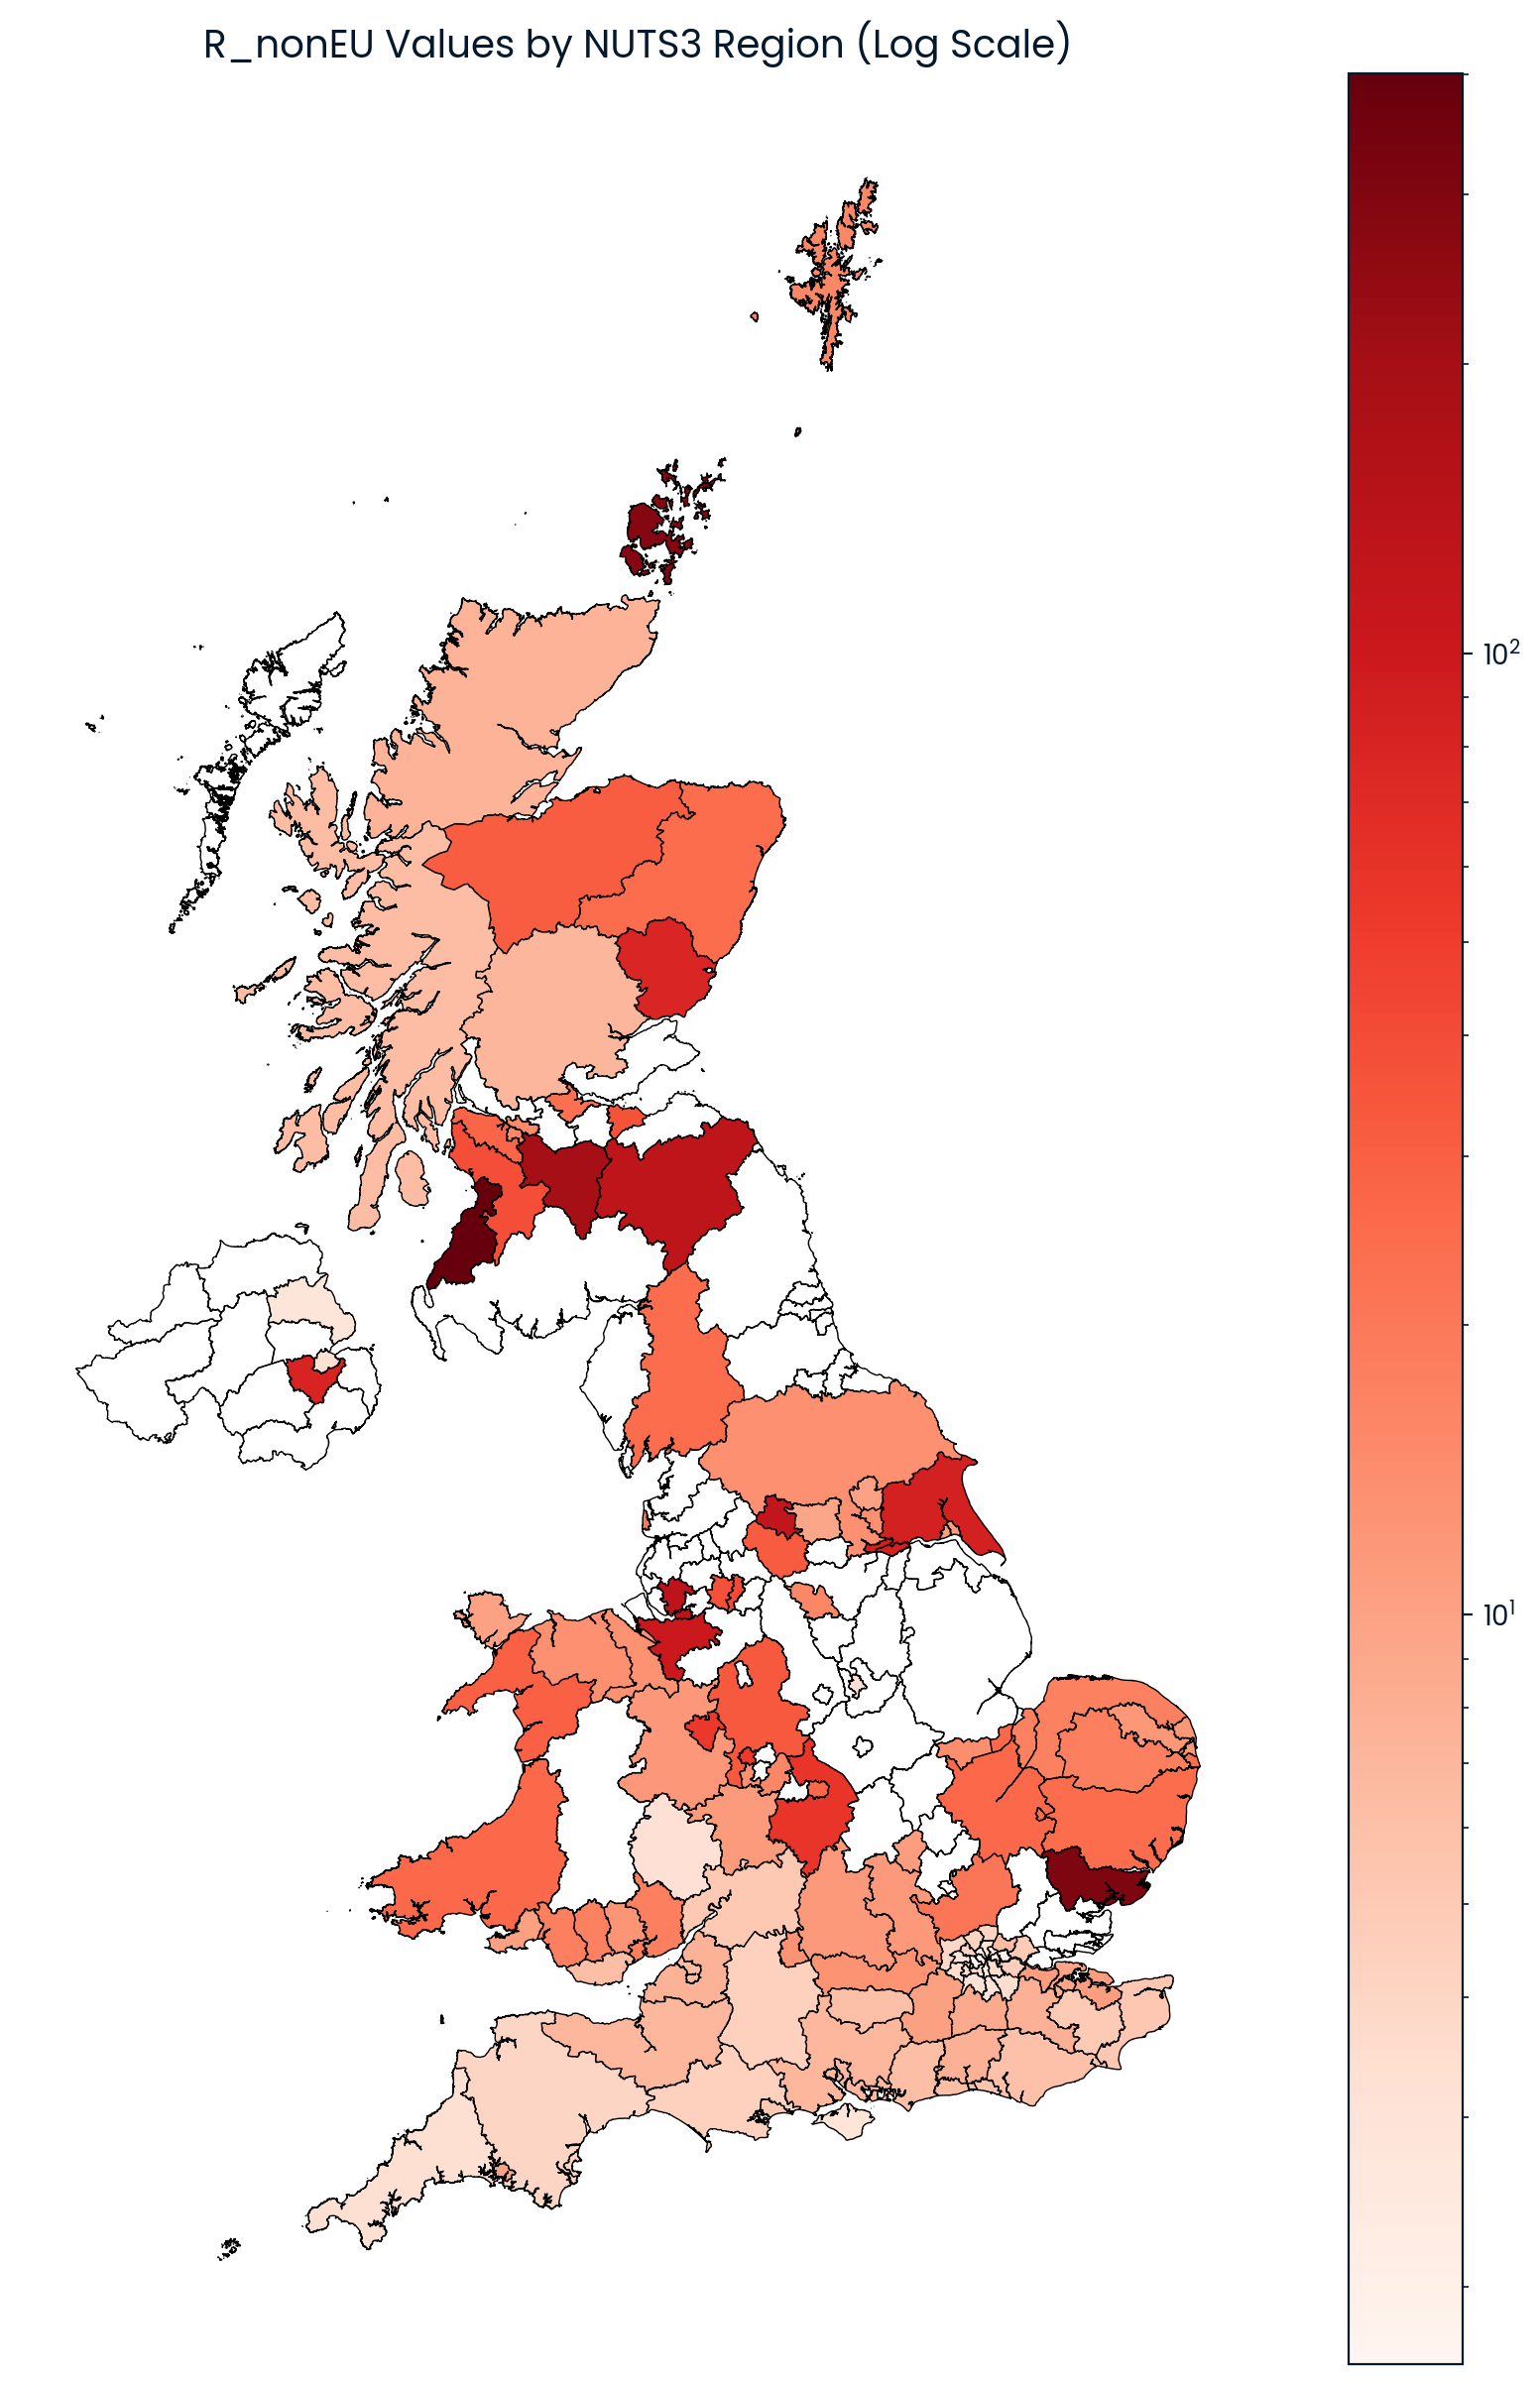

In [6]:
# Plot the values for R_nonEU on the map using a logarithmic scale to capture small values better
fig, ax = plt.subplots(1, 1, figsize=(12, 15))
map_df.plot(column='R_nonEU', ax=ax, legend=True, cmap='Reds', edgecolor='black', linewidth=0.5, norm=mcolors.LogNorm())
ax.set_title("R_nonEU Values by NUTS3 Region (Log Scale)", fontsize=14)
ax.set_axis_off()

# Save the figure as a PNG file
plt.savefig("R_nonEU_NUTS3_Region_Log_Scale.png", format='png', bbox_inches='tight')

plt.show()

## Sectoral Replacement Ratio

In [7]:
sec_rr

,industry_code,proportion_eu_employees_pre,proportion_non_eu_employees_pre,proportion_eu_employees_post,proportion_non_eu_employees_post,delta_eu,delta_noneu,replacement_ratio,substitution_flag
0,Q,0.050690,0.094333,0.050341,0.152420,-0.000349,0.058087,166.615349,1
1,M,0.076385,0.072072,0.074682,0.098673,-0.001703,0.026601,15.619716,1
2,E,0.074226,0.021185,0.071042,0.029329,-0.003184,0.008144,2.557938,1
3,R,0.050284,0.029340,0.046000,0.039287,-0.004284,0.009947,2.321717,1
4,N,0.172823,0.092303,0.133872,0.156810,-0.038951,0.064506,1.656111,1
5,I,0.177312,0.098491,0.124615,0.146121,-0.052696,0.047630,0.903857,1
6,A,0.196804,0.012577,0.133744,0.051888,-0.063060,0.039311,0.623386,1
7,L,0.047742,0.047068,0.050229,0.063764,0.002487,0.016696,0.000000,0
8,S,0.058890,0.066536,0.058941,0.103128,0.000051,0.036592,0.000000,0
9,P,0.040699,0.044366,0.044434,0.059748,0.003735,0.015383,0.000000,0


In [8]:
# Sort the DataFrame by 'industry_code'
sec_rr = sec_rr.sort_values(by='industry_code')

# Define the industry names in the same order as the industry codes
industry_names = [
    "Agriculture", "Mining", "Manufacturing", "Utilities", "Water & Waste", 
    "Construction", "Retail", "Transport", "Accommodation & Food", 
    "Information & Communication", "Finance", "Real Estate", 
    "Professional Services", "Admin & Support", "Public Admin & Defence", 
    "Education", "Health & Social Work", "Arts, Entertainment", 
    "Other Service Activities", "Households as Employers"
]

# Add the new column to the DataFrame
sec_rr['industry_name'] = industry_names

# Display the DataFrame to verify the changes
sec_rr

,industry_code,proportion_eu_employees_pre,proportion_non_eu_employees_pre,proportion_eu_employees_post,proportion_non_eu_employees_post,delta_eu,delta_noneu,replacement_ratio,substitution_flag,industry_name
6,A,0.196804,0.012577,0.133744,0.051888,-0.063060,0.039311,0.623386,1,Agriculture
12,B,0.036759,0.035183,0.038966,0.044029,0.002206,0.008845,0.000000,0,Mining
18,C,0.112961,0.035712,0.119025,0.054734,0.006064,0.019022,0.000000,0,Manufacturing
17,D,0.026093,0.024873,0.033672,0.046464,0.007579,0.021591,0.000000,0,Utilities
2,E,0.074226,0.021185,0.071042,0.029329,-0.003184,0.008144,2.557938,1,Water & Waste
16,F,0.056498,0.024426,0.069103,0.039108,0.012605,0.014681,0.000000,0,Construction
15,G,0.064717,0.050618,0.070073,0.076394,0.005356,0.025776,0.000000,0,Retail
14,H,0.102174,0.048983,0.127117,0.081222,0.024943,0.032239,0.000000,0,Transport
5,I,0.177312,0.098491,0.124615,0.146121,-0.052696,0.047630,0.903857,1,Accommodation & Food
13,J,0.068849,0.105699,0.076260,0.127632,0.007411,0.021933,0.000000,0,Information & Communication


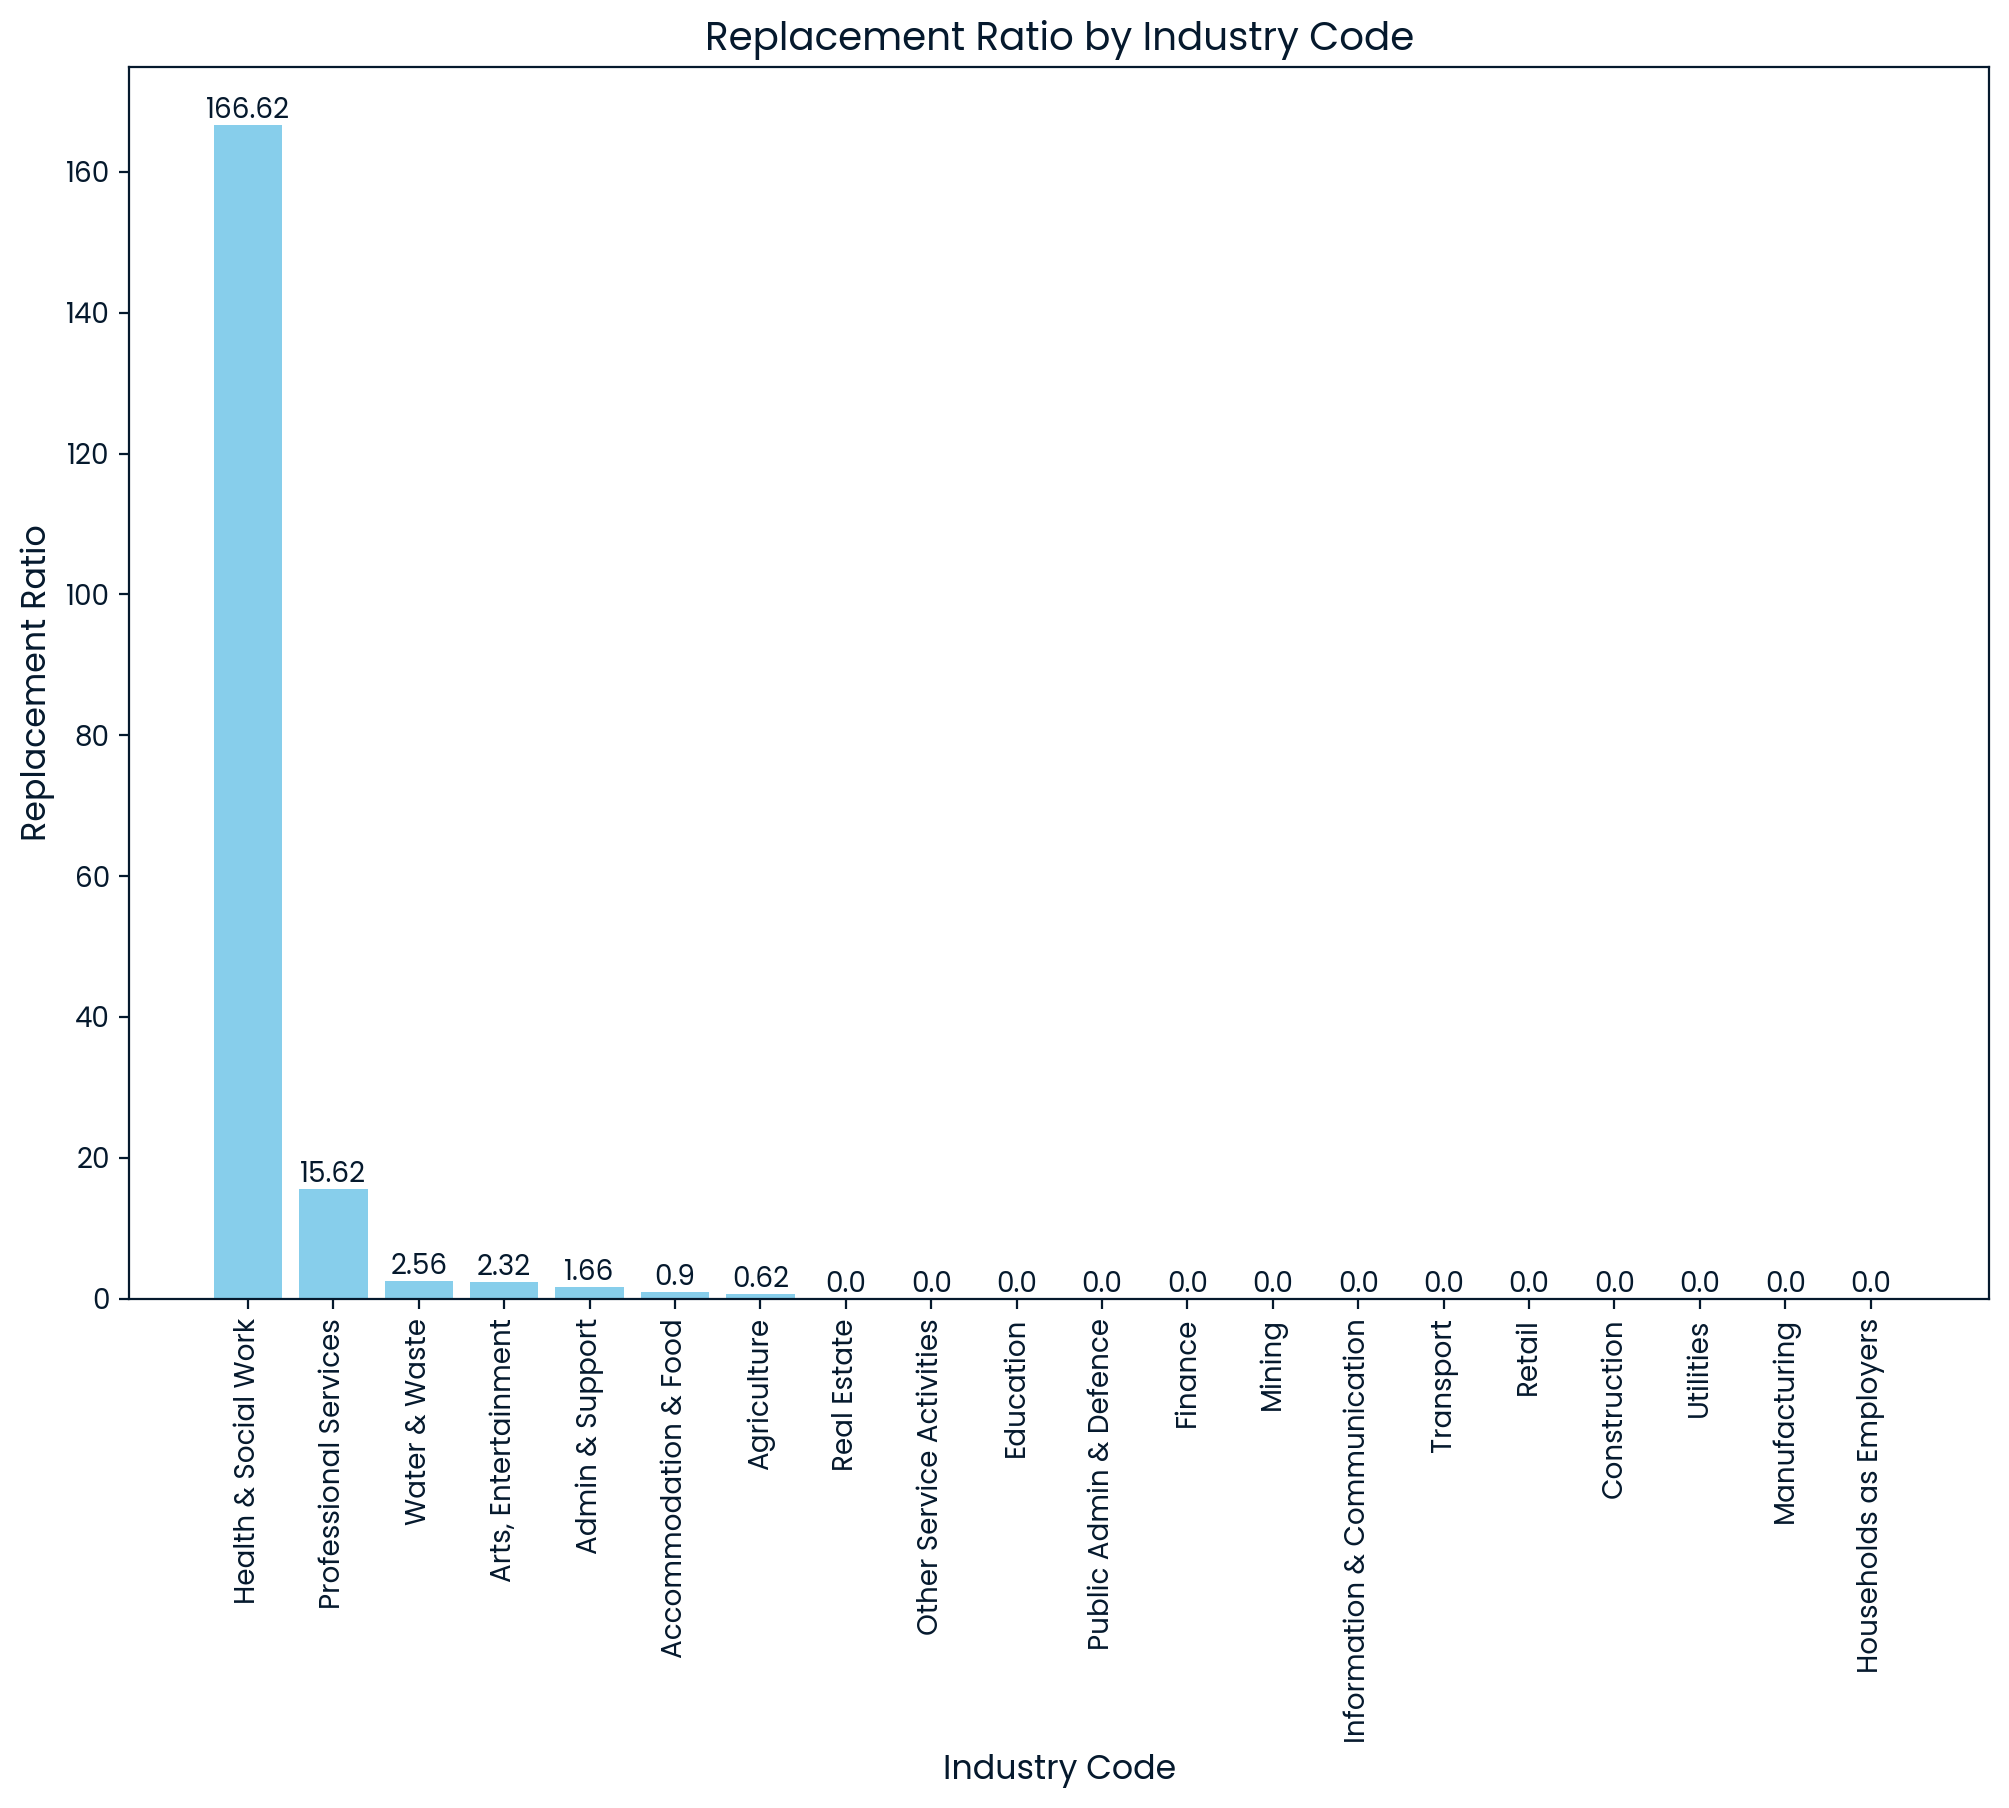

In [9]:
# Sort the dataframe by replacement_ratio in descending order
sec_rr_sorted = sec_rr.sort_values(by='replacement_ratio', ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(sec_rr_sorted['industry_name'], sec_rr_sorted['replacement_ratio'], color='skyblue')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Industry Code', fontsize=12)
ax.set_ylabel('Replacement Ratio', fontsize=12)
ax.set_title('Replacement Ratio by Industry Code', fontsize=14)
ax.set_xticklabels(sec_rr_sorted['industry_name'], rotation=90)

# Save the figure as a PNG file
plt.savefig('replacement_ratio_by_industry.png', bbox_inches='tight')

plt.show()